# Generative art: using paths

In the previous chapter we created images by adding shapes and coloring them. Alternatively we can proceed as if we were drawing by hands, specifying the path of the pen. For that we will use the turtle module of Python, which allows to control the movements of a turtle in a 2D plane. Let's import the module and make a simple example:

In [1]:
import turtle
import random
import math

First we create the "turtle":

In [2]:
t = turtle.Turtle()

Now we can move the turtle around using for example:

- ```goto(x, y)```
- ```right(angle)``` or ```left(angle)```
- ```forward(distance)```

In [3]:
turtle.screensize()

(400, 300)

In [4]:
t.goto(100,50)
t.right(45)
t.forward(50)

We see that the whole path of followed gets drawn. If we don't want certain parts to be drawn we can just lift the pen with ```penup``` and then put it back down with ```pendown```:

In [5]:
t.penup()
t.goto(-100,-30)
t.pendown()
t.forward(100)

We can also change the look of the drawing:

In [6]:
t.pensize(10)
t.pencolor((1,0.5,0.2))

t.left(50)
t.forward(100)

There are some geometrical primitives we can use, such as circle, dot

In [7]:
t.right(90)
t.pencolor(0,0,1)
t.circle(40)
t.forward(100)
t.dot(20)

Finally we can draw polygons by connecting multiple locations. We can even fill them with color:

In [8]:
t.fillcolor((0,1,0))
t.begin_fill()
t.begin_poly()
t.goto(20,20)
t.goto(120,20)
t.goto(120,120)
t.end_fill()
t.end_poly()

At the end we can save our picture. First we have to save it in ps format, which is a vectorial format (not pixels). We can then convert that image e.g. to png using the PIL library. If you get an error about "Unable to locate Ghostscript on paths" you have to install Ghostscript in your current environment using:

```conda install -c conda-forge ghostscript```

Let's first hide the turtle location:

In [9]:
t.hideturtle()

and now save the image:

In [11]:
from PIL import Image

screen = turtle.Screen()
screen.getcanvas().postscript(file="output/turtle_drawing.ps")

im = Image.open('output/turtle_drawing.ps')
im.save('output/turtle_drawing.png')

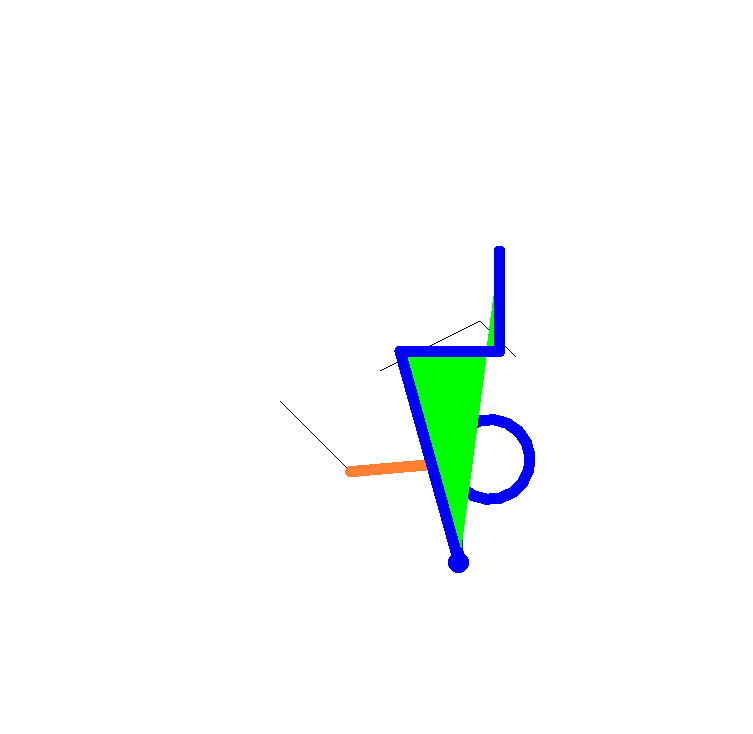

In [12]:
im

Let's make a function for displaying images to make our life simpler:

In [13]:
from PIL import Image
def display_turtle_image(reduce=2):
    
    screen = turtle.Screen()
    screen.getcanvas().postscript(file="output/temp_drawing.ps")

    im = Image.open('output/temp_drawing.ps')
    im = im.reduce(reduce)
    return im

## Useful snippets

First, we want to hide the turtle in our final image:

In [14]:
t.hideturtle()

Then we don't want to wait on the drawing to be made, so we hide the turtle moves. Note that because of that we have to manually update the drawing:

In [15]:
turtle.tracer(0)
turtle.update()

We also want to start with a clear window:

In [16]:
turtle.clearscreen()

Finally, we may want to automate some drawings. For example, there's no function to draw a square at a specific location. So let's define one: 

- First it moves to a specific location, the top left corner which is located at a given location (center of the square) minus half the square size
- Then it will draw a line and turn by 90° four times

In [17]:
def draw_square(t, x, y, d):
    t.penup()
    t.goto(x - d / 2, y - d / 2)
    t.pendown()
    for i in range(4):
        t.forward(d)
        t.left(90)

Let's try it by assembling the above tools: 

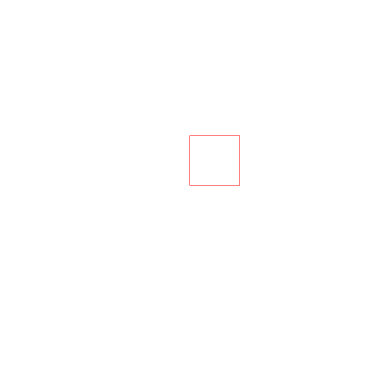

In [18]:
turtle.clearscreen()
turtle.tracer(0)

t = turtle.Turtle()
t.hideturtle()
t.pencolor((1,0,0))
draw_square(t=t, x=50, y=50, d=100)
turtle.update()
display_turtle_image()

Now we can do generative art e.g. by using our function multiple times. Let's create multiple nested squares (varying diameters) at various locations and in various colors:

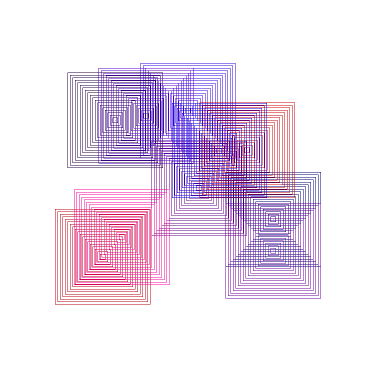

In [19]:
turtle.clearscreen()
turtle.tracer(0)

t = turtle.Turtle()
t.hideturtle()

for i in range(10):
    t.pencolor((random.random(),0,random.random()))
    x = random.randint(-200,200)
    y = random.randint(-150, 150)
    for i in range(20):
        diameter = i * 10
        draw_square(t=t, x=x, y=y, d=diameter)
    turtle.update()
display_turtle_image()

## Mathematical functions

There are many examples of mathematical functions generating interesting patterns such as fractals. We look at one very simple example here, the Euler curve. It's defined by creating a path of constant step size and an increasing rotation at each step:

In [20]:
def euler_curve(step_size, angle_step, n_steps):

    angle = 0
    for i in range(n_steps):
        turtle.right(angle)
        turtle.forward(step_size)
        angle += angle_step

It creates a basic pattern of a double spiral, and the exact organisation of the patterns is set by the step and angle parameters:

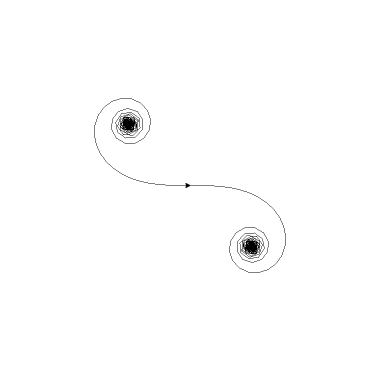

In [21]:
t = turtle.Turtle()
turtle.clearscreen()
turtle.tracer(0)
t.hideturtle()
euler_curve(step_size=20, angle_step=1.2, n_steps=3000)
turtle.update()
display_turtle_image()

In [22]:
t = turtle.Turtle()
turtle.clearscreen()
turtle.tracer(0)
t.hideturtle()
euler_curve(step_size=2, angle_step=2.01, n_steps=40000)
turtle.update()

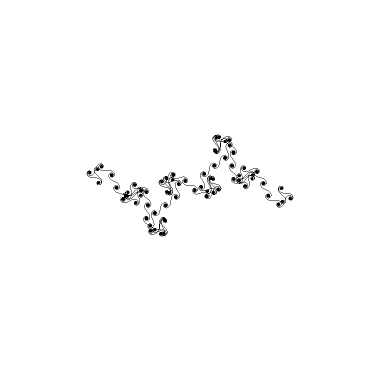

In [23]:
display_turtle_image()

## Exercise

We have defined above a function to create a square. You are now going to adapt that function to try recreating a picture made of squares. Either the "Schotter" image from the Geoerg Nees (© Victoria and Albert Museum, London, https://collections.vam.ac.uk/item/O221321/schotter-print-nees-georg/) or one of the matrix multiplication images (matrix multiplications, Frieder Nake, 1967, Photo: © Tate, London 2024, https://www.tate.org.uk/art/artworks/nake-matrix-multiplications-128667):

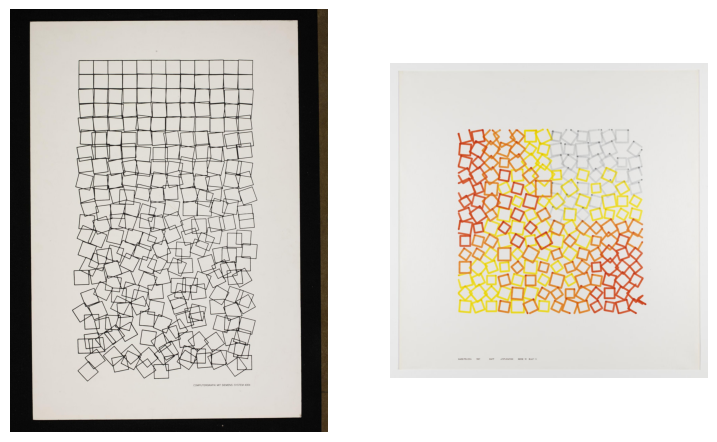

In [28]:
import skimage
import matplotlib.pyplot as plt

schotter = skimage.io.imread('data/Nees_schotter.jpg')
matrix = skimage.io.imread('data/matrix_multiplication.jpg')
fig, ax = plt.subplots(1,2, figsize=(9,9))
ax[0].imshow(schotter);
ax[1].imshow(matrix);
ax[0].set_axis_off()
ax[1].set_axis_off()